In [55]:
# imports
import re
import pandas as pd
from packages.utils.constants import *
import nltk
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
frame = pd.read_csv("data/spreadsheets/Dia2MSA_Egy_MSA_Verfied.tsv", sep='\t')
frame.sort_values(by='confidence')
frame = frame.drop_duplicates(subset='id', keep='first')
assert frame['id'].is_unique

5563


In [27]:
def count_num_lines(fname):
    frame = pd.read_csv(fname, sep='\t')
    return len(frame)

print(f"Egyptian: {count_num_lines('data/spreadsheets/Clean_dia2msa/Dia2MSA_Egy_MSA_Verfied.tsv')}")
print(f"Levantine: {count_num_lines('data/spreadsheets/Clean_dia2msa/Dia2MSA_LEV_MSA_not_Verfied.tsv')}")
print(f"Gulf: {count_num_lines('data/spreadsheets/Clean_dia2msa/Dia2MSA_GLF_MSA_Not_Verfied.tsv')}")
print(f"Maghrebi: {count_num_lines('data/spreadsheets/Clean_dia2msa/Dia2MSA_MGB_MSA_Verfied.tsv')}")

Egyptian: 16355
Levantine: 17893
Gulf: 17591
Maghrebi: 7912


In [31]:
def eval_jacc_sent_pair(sent1, sent2):
    if type(sent1) is float or type(sent2) is float:
        return INVALID_JACC

    sent_1_tokens = set(sent1.split(' '))
    sent_2_tokens = set(sent2.split(' '))
    return len(sent_1_tokens.intersection(sent_2_tokens)) / len(sent_1_tokens.union(sent_2_tokens))

egypt_frame = pd.read_csv("data/spreadsheets/Clean_dia2msa/Dia2MSA_Egy_MSA_Verfied.tsv", sep="\t")
# TODO: need to use some other models to 
egypt_frame['jacc'] = egypt_frame[['target', 'source']].apply(lambda row: eval_jacc_sent_pair(row.target, row.source), axis=1)
print(egypt_frame['jacc'])

0        0.307692
1        0.250000
2        0.105263
3        0.095238
4        0.000000
           ...   
16350    0.111111
16351    0.133333
16352    0.096774
16353    0.060606
16354    0.178571
Name: jacc, Length: 16355, dtype: float64


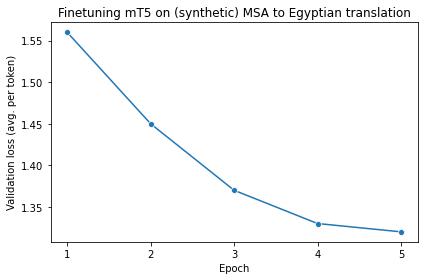

In [17]:

ax = sns.lineplot(
    x = map(str, [1,2,3,4,5]),
    y = [1.56, 1.45, 1.37, 1.33, 1.32],
    marker='o'
)
ax.set_xlabel("Epoch")
ax.set_ylabel("Validation loss (avg. per token)")
ax.set_title("Finetuning mT5 on (synthetic) MSA to Egyptian translation")
plt.tight_layout()
plt.savefig('finetune_egy_msa.png')


In [62]:
def reconstruct_sentence(input_sent, target_sent):
    # tag_re = r"(</s>)|(<extra_id_(\d)+)"
    tag_re = r"\</s\>|\<extra_id_\d\>"
    input_tokens = re.split(tag_re, input_sent)
    print(input_tokens)
    label_tokens = re.split(tag_re, target_sent)
    print(label_tokens)
    reconstructed_tokens = [x.strip() for x in itertools.chain(*itertools.zip_longest(input_tokens, label_tokens)) if (x and x.strip()) ]
    sent = ' '.join(reconstructed_tokens)
        # e.g.,:. have to make sure the spacing is consistent, otherwise the tokenization won't work.
        # ربنا مجيب الدعاء بس ما تستعجلش عشان جلالتة بيستجيبلك بس بيبعتهالك<extra_id_0> فين ؟ وكل <extra_id_1>مش وقتك انت و بتبقى احلى</s>     MSA
    return sent

In [63]:
# tag_re = r"^\<extra_id_\d\>"
# input_sent = "<extra_id_0> بعض"
# input_tokens = [x.strip() for x in re.split(tag_re, input_sent) if x]
# print(input_tokens)
res = reconstruct_sentence("جروب الواتس الخاص بهذه العائلات عقاب من <extra_id_0> </s>", "<extra_id_0> بعض")
print(res)

['جروب الواتس الخاص بهذه العائلات عقاب من ', ' ', '']
['', ' بعض']
جروب الواتس الخاص بهذه العائلات عقاب من بعض
